### **Task 2: Sentiment and Thematic Analysis**
- Description: Quantify review sentiment and identify themes to uncover satisfaction drivers and pain points.

In [14]:
import os 
import sys

system_path = os.path.abspath("..")
if system_path not in sys.path:
    sys.path.append(system_path)

%load_ext autoreload
%autoreload 2
from scripts.sentiment.sentiment_analysis import SentimentAnalyzer, aggregate_sentiment
from scripts.data.preprocess import PreprocessReview

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
preprocess = PreprocessReview()
sentiment = SentimentAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jonep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
INFO:scripts.sentiment.sentiment_analysis:Sentiment analysis models loaded successfully


- **Load Review Data** - Reading or Loading cleaned data  

In [3]:
bank_review = preprocess.load_data('../data/processed/cleaned_bank_review.csv')
bank_review

,review,rating,review_date,app_name,source
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store
4,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store
...,...,...,...,...,...
8987,Perfect app,5,2024-01-12,BoA Mobile,Google Play Store
8988,👍,3,2024-01-11,BoA Mobile,Google Play Store
8989,Absolutely it's fantastic apps this New apps i...,5,2024-01-11,BoA Mobile,Google Play Store
8990,The best app next to Tele birr in ethiopia,5,2024-01-10,BoA Mobile,Google Play Store


In [4]:
review_with_emoji = preprocess.filter_emoji_rows(bank_review, 'review')
review_with_emoji

,review,rating,review_date,app_name,source
13,👌👍,5,2025-06-04,Commercial Bank of Ethiopia,Google Play Store
30,"it,s good app and time manager 👍",5,2025-05-30,Commercial Bank of Ethiopia,Google Play Store
39,🤬🤬🤬🤬 network 🛜,1,2025-05-26,Commercial Bank of Ethiopia,Google Play Store
49,Ronaldo 🇵🇹 🥇,5,2025-05-25,Commercial Bank of Ethiopia,Google Play Store
55,👍,5,2025-05-24,Commercial Bank of Ethiopia,Google Play Store
...,...,...,...,...,...
8964,👍,5,2024-01-28,BoA Mobile,Google Play Store
8979,👏👏👏,5,2024-01-16,BoA Mobile,Google Play Store
8986,Best application👍Thank you ! Abyssinia bank.,5,2024-01-12,BoA Mobile,Google Play Store
8988,👍,3,2024-01-11,BoA Mobile,Google Play Store


In [5]:
clean_bank_review = preprocess.preprocess_reviews(bank_review, 'review')
clean_bank_review

,review,rating,review_date,app_name,source,preprocessed_review
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,cannot send cbebirr app app
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,good
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,functional
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,everytime uninstall app reach physically oldy ...
4,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,mr space
...,...,...,...,...,...,...
8987,Perfect app,5,2024-01-12,BoA Mobile,Google Play Store,perfect app
8988,👍,3,2024-01-11,BoA Mobile,Google Play Store,thumbsup
8989,Absolutely it's fantastic apps this New apps i...,5,2024-01-11,BoA Mobile,Google Play Store,absolutely fantastic apps new apps fast good apps
8990,The best app next to Tele birr in ethiopia,5,2024-01-10,BoA Mobile,Google Play Store,best app next tele birr ethiopia


- Applying Distilbert based sentiment analysis

In [8]:
import pandas as pd
def get_sentiment(text):
    try:
        label, score = sentiment.analyze_with_distilbert(text)
        return pd.Series([label, score])
    except Exception as e:
        print(f"Error processing text: {text[:50]}... Error: {str(e)}")
        return pd.Series(['ERROR', 0.0])

clean_bank_review[['sentiment_distilbert_label', 'sentiment_distilbert_score']] = clean_bank_review['preprocessed_review'].apply(get_sentiment)

In [10]:
clean_bank_review

,review,rating,review_date,app_name,source,preprocessed_review,sentiment_veder_label,sentiment_veder_score,sentiment_distilbert_label,sentiment_distilbert_score
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,cannot send cbebirr app app,NEUTRAL,0.0000,NEGATIVE,0.997447
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,good,POSITIVE,0.4404,POSITIVE,0.999816
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,functional,NEUTRAL,0.0000,POSITIVE,0.999333
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,everytime uninstall app reach physically oldy ...,NEUTRAL,0.0258,NEGATIVE,0.994716
4,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,mr space,NEUTRAL,0.0000,POSITIVE,0.991881
...,...,...,...,...,...,...,...,...,...,...
8987,Perfect app,5,2024-01-12,BoA Mobile,Google Play Store,perfect app,POSITIVE,0.5719,POSITIVE,0.999834
8988,👍,3,2024-01-11,BoA Mobile,Google Play Store,thumbsup,NEUTRAL,0.0000,POSITIVE,0.995795
8989,Absolutely it's fantastic apps this New apps i...,5,2024-01-11,BoA Mobile,Google Play Store,absolutely fantastic apps new apps fast good apps,POSITIVE,0.7778,POSITIVE,0.999877
8990,The best app next to Tele birr in ethiopia,5,2024-01-10,BoA Mobile,Google Play Store,best app next tele birr ethiopia,POSITIVE,0.6369,POSITIVE,0.969149


- Applying veder based sentiment anaysis

In [6]:
import pandas as pd
def get_sentiment(text):
    try:
        label, score = sentiment.analyze_with_vader(text)
        return pd.Series([label, score])
    except Exception as e:
        print(f"Error processing text: {text[:50]}... Error: {str(e)}")
        return pd.Series(['ERROR', 0.0])

clean_bank_review[['sentiment_veder_label', 'sentiment_veder_score']] = clean_bank_review['preprocessed_review'].apply(get_sentiment)


In [7]:
clean_bank_review

,review,rating,review_date,app_name,source,preprocessed_review,sentiment_veder_label,sentiment_veder_score
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,cannot send cbebirr app app,NEUTRAL,0.0000
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,good,POSITIVE,0.4404
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,functional,NEUTRAL,0.0000
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,everytime uninstall app reach physically oldy ...,NEUTRAL,0.0258
4,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,mr space,NEUTRAL,0.0000
...,...,...,...,...,...,...,...,...
8987,Perfect app,5,2024-01-12,BoA Mobile,Google Play Store,perfect app,POSITIVE,0.5719
8988,👍,3,2024-01-11,BoA Mobile,Google Play Store,thumbsup,NEUTRAL,0.0000
8989,Absolutely it's fantastic apps this New apps i...,5,2024-01-11,BoA Mobile,Google Play Store,absolutely fantastic apps new apps fast good apps,POSITIVE,0.7778
8990,The best app next to Tele birr in ethiopia,5,2024-01-10,BoA Mobile,Google Play Store,best app next tele birr ethiopia,POSITIVE,0.6369


In [15]:
clean_bank_review['veder']= clean_bank_review['preprocessed_review'].apply(lambda x: sentiment.analyze_with_vader(x))
clean_bank_review

,review,rating,review_date,app_name,source,preprocessed_review,distilbert,veder
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,cannot send cbebirr app app,"{'sentiment_label': 'NEGATIVE', 'positive_scor...",NEUTRAL
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,good,"{'sentiment_label': 'POSITIVE', 'positive_scor...",POSITIVE
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,functional,"{'sentiment_label': 'POSITIVE', 'positive_scor...",NEUTRAL
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,everytime uninstall app reach physically oldy ...,"{'sentiment_label': 'NEGATIVE', 'positive_scor...",NEUTRAL
4,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,mr space,"{'sentiment_label': 'POSITIVE', 'positive_scor...",NEUTRAL
...,...,...,...,...,...,...,...,...
8987,Perfect app,5,2024-01-12,BoA Mobile,Google Play Store,perfect app,"{'sentiment_label': 'POSITIVE', 'positive_scor...",POSITIVE
8988,👍,3,2024-01-11,BoA Mobile,Google Play Store,thumbsup,"{'sentiment_label': 'POSITIVE', 'positive_scor...",NEUTRAL
8989,Absolutely it's fantastic apps this New apps i...,5,2024-01-11,BoA Mobile,Google Play Store,absolutely fantastic apps new apps fast good apps,"{'sentiment_label': 'POSITIVE', 'positive_scor...",POSITIVE
8990,The best app next to Tele birr in ethiopia,5,2024-01-10,BoA Mobile,Google Play Store,best app next tele birr ethiopia,"{'sentiment_label': 'POSITIVE', 'positive_scor...",POSITIVE


In [12]:
clean_bank_review

,review,rating,review_date,app_name,source,preprocessed_review,sentiment_veder_label,sentiment_veder_score,sentiment_distilbert_label,sentiment_distilbert_score
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,cannot send cbebirr app app,NEUTRAL,0.0000,NEGATIVE,0.997447
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,good,POSITIVE,0.4404,POSITIVE,0.999816
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,functional,NEUTRAL,0.0000,POSITIVE,0.999333
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,everytime uninstall app reach physically oldy ...,NEUTRAL,0.0258,NEGATIVE,0.994716
4,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,mr space,NEUTRAL,0.0000,POSITIVE,0.991881
...,...,...,...,...,...,...,...,...,...,...
8987,Perfect app,5,2024-01-12,BoA Mobile,Google Play Store,perfect app,POSITIVE,0.5719,POSITIVE,0.999834
8988,👍,3,2024-01-11,BoA Mobile,Google Play Store,thumbsup,NEUTRAL,0.0000,POSITIVE,0.995795
8989,Absolutely it's fantastic apps this New apps i...,5,2024-01-11,BoA Mobile,Google Play Store,absolutely fantastic apps new apps fast good apps,POSITIVE,0.7778,POSITIVE,0.999877
8990,The best app next to Tele birr in ethiopia,5,2024-01-10,BoA Mobile,Google Play Store,best app next tele birr ethiopia,POSITIVE,0.6369,POSITIVE,0.969149


In [ ]:
# Saving clean dataset with sentiment analysis
clean_bank_review.to_csv("../data/processed/sentiment_bank_review.csv", index=False)

- Aggregate bank and rating 

In [ ]:
aggregate_sentiment(clean_bank_review)

app_name rating sentiment_veder_score        \
                                                        mean count   
0                    BoA Mobile      1             -0.130714   422   
1                    BoA Mobile      2              0.024617    52   
2                    BoA Mobile      3              0.189275    65   
3                    BoA Mobile      4              0.326227    48   
4                    BoA Mobile      5              0.374139   458   
5   Commercial Bank of Ethiopia      1             -0.032642  1122   
6   Commercial Bank of Ethiopia      2              0.082617   300   
7   Commercial Bank of Ethiopia      3              0.232699   470   
8   Commercial Bank of Ethiopia      4              0.373017   770   
9   Commercial Bank of Ethiopia      5              0.392424  4837   
10                  Dashen Bank      1              0.079306    34   
11                  Dashen Bank      2             -0.019912    17   
12                  Dashen Bank      3              0.326727    11   
13                  Dashen Bank      4              0.360021    24   
14                  Dashen Bank      5              0.530147   362   

                                sentiment_veder_label  
                                             <lambda>  
0   {'NEGATIVE': 194, 'NEUTRAL': 131, 'POSITIVE': 97}  
1     {'NEUTRAL': 20, 'POSITIVE': 17, 'NEGATIVE': 15}  
2      {'POSITIVE': 31, 'NEUTRAL': 26, 'NEGATIVE': 8}  
3      {'POSITIVE': 32, 'NEUTRAL': 14, 'NEGATIVE': 2}  
4    {'POSITIVE': 323, 'NEUTRAL': 130, 'NEGATIVE': 5}  
5   {'NEUTRAL': 423, 'NEGATIVE': 370, 'POSITIVE': ...  
6   {'POSITIVE': 114, 'NEUTRAL': 110, 'NEGATIVE': 76}  
7   {'POSITIVE': 265, 'NEUTRAL': 152, 'NEGATIVE': 53}  
8   {'POSITIVE': 573, 'NEUTRAL': 154, 'NEGATIVE': 43}  
9   {'POSITIVE': 3642, 'NEUTRAL': 1127, 'NEGATIVE'...  
10      {'POSITIVE': 16, 'NEGATIVE': 9, 'NEUTRAL': 9}  
11       {'NEUTRAL': 7, 'NEGATIVE': 5, 'POSITIVE': 5}  
12                      {'POSITIVE': 8, 'NEUTRAL': 3}  
13      {'POSITIVE': 16, 'NEUTRAL': 7, 'NEGATIVE': 1}  
14    {'POSITIVE': 295, 'NEUTRAL': 65, 'NEGATIVE': 2}

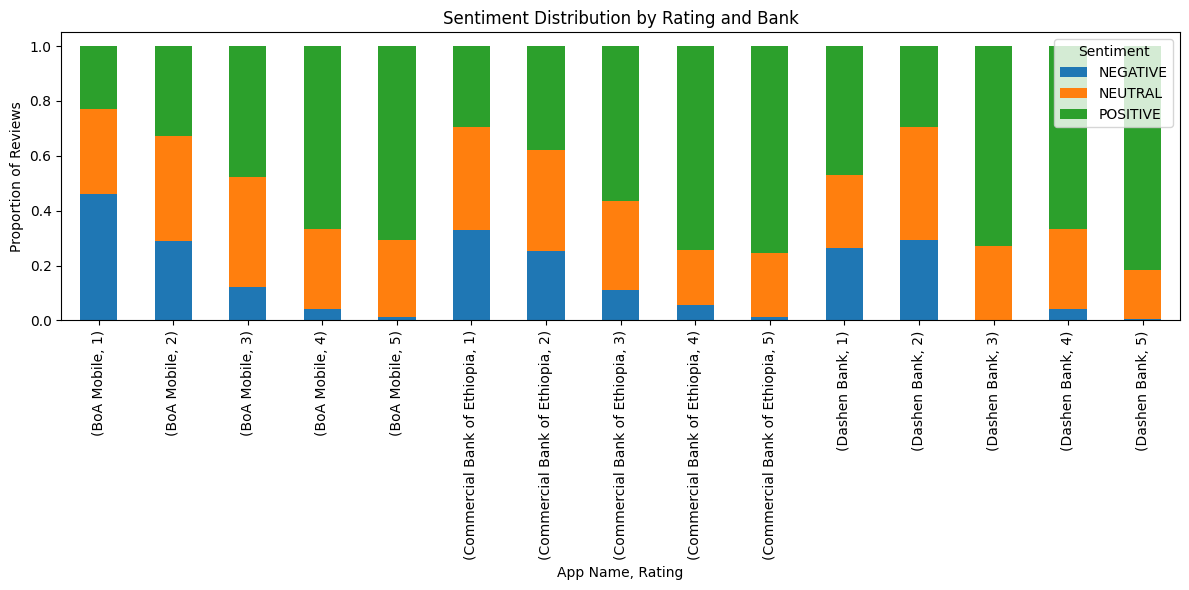

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sentiment_by_rating = clean_bank_review.groupby(['app_name', 'rating', 'sentiment_veder_label']).size().unstack(fill_value=0)
sentiment_by_rating = sentiment_by_rating.div(sentiment_by_rating.sum(axis=1), axis=0)  # Normalize to proportions
sentiment_by_rating.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Sentiment Distribution by Rating and Bank')
plt.xlabel('App Name, Rating')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [4]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

inputs = tokenizer("Hello, my dog is happy", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'NEGATIVE'

In [5]:
inputs

{'input_ids': tensor([[ 101, 7592, 1010, 2026, 3899, 3475, 1005, 1056, 3407,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}